# Calculating the Risk of a Security

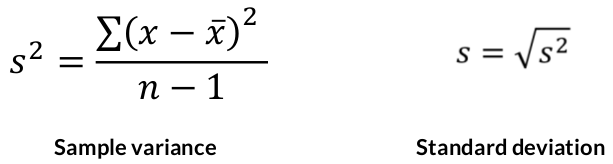

In [26]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [27]:
# BEI.DE => BEIERSDORF AG O.N.
tickers = ["PG", "BEI.DE"]

securities_data = pd.DataFrame()

for ticker in tickers:
    securities_data[ticker] = web.DataReader(ticker, data_source="yahoo", start="2007-1-1")["Adj Close"]

In [28]:
securities_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3421 entries, 2007-01-03 to 2020-08-04
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      3421 non-null   float64
 1   BEI.DE  3358 non-null   float64
dtypes: float64(2)
memory usage: 80.2 KB


In [29]:
# using log because we will analise the data of the securities separatly 
securities_return = np.log(securities_data / securities_data.shift(1))

In [30]:
print(securities_return)

                  PG    BEI.DE
Date                          
2007-01-03       NaN       NaN
2007-01-04 -0.007621  0.006544
2007-01-05 -0.008624 -0.020772
2007-01-08  0.002202  0.000202
2007-01-09 -0.002517 -0.022858
...              ...       ...
2020-07-29  0.003357  0.010721
2020-07-30  0.023949 -0.021559
2020-07-31 -0.002285  0.001979
2020-08-03  0.001296  0.016667
2020-08-04  0.018863 -0.005851

[3421 rows x 2 columns]


## Procter & Gamble

### Daily average return 

In [31]:
securities_return["PG"].mean()

0.00033273050333790667

### Annualy average return

In [32]:
securities_return["PG"].mean() * 250

0.08318262583447666

### Daily Standard Deviation (Risk or Volatility)

In [33]:
# std stands from STandard Deviation
securities_return["PG"].std()

0.011950486772649187

### Annualy Standard Deviation

In [34]:
securities_return["PG"].std() * 250

2.9876216931622968

## Beiersdorf

In [35]:
# daily average return
securities_return["BEI.DE"].mean()

0.00025541079914458966

In [36]:
# annualy  average return
securities_return["BEI.DE"].mean() * 250

0.06385269978614741

In [37]:
# daily standard deviation
securities_return["BEI.DE"].std()

0.01381346253434532

In [38]:
# annualy standard deviation
securities_return["BEI.DE"].mean() * 250

0.06385269978614741

### Calculating both securities at the same time

In [39]:
# daily average return
securities_return[["PG","BEI.DE"]].mean()

PG        0.000333
BEI.DE    0.000255
dtype: float64

In [40]:
# annualy average return
securities_return[["PG","BEI.DE"]].mean() * 250

PG        0.083183
BEI.DE    0.063853
dtype: float64

In [41]:
# daily standard deviation
securities_return[["PG","BEI.DE"]].std()

PG        0.011950
BEI.DE    0.013813
dtype: float64

In [42]:
# annualy standard deviation 
# multiplying for 0.5 represents the square root of the variance
# s = √s² (standard deviation = square root of the variance
securities_return[["PG","BEI.DE"]].std() * 250 ** 0.5

PG        0.188954
BEI.DE    0.218410
dtype: float64